# ESPN Subscriber Analysis

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 10000)

# Notes
Note that the field ‘subscription_source_ref’ is a subscription ID while the SWID is a unified ID which is not required for a subscription. These IDs are anonymized, unique and persistent
First stream = the very first video or live show watched after subscribing (whether free or paid subscription)
Second stream = the second video or live show watched after subscribing (whether free or paid subscription)
Date fields:
Signup date = data at which subscriber signed up (free trial or paid)
Free trial convert data = date at which the subscriber switched from free to paid
Expiration data = date at which subscriber churns

In [4]:
# load data
dfl = pd.read_csv('lifetime_metrics.csv')
dfm = pd.read_csv('media_meta_data.csv')
dfs = pd.read_csv('subscription_day.csv') #Subscriber data from 10/1/2018 - 10/11/2018

In [5]:
# joins
dfsl = dfs.merge(dfl, left_on='subscription_source_ref', right_on='subscription_source_ref', how='inner', suffixes=('_s', '_l'))
dfm1 = dfsl.merge(dfm, left_on='first_stream_media_id', right_on='mediaid', how='left', suffixes=('', '_m1'))
df = dfm1.merge(dfm, left_on='second_stream_media_id', right_on='mediaid', how='left', suffixes=('', '_m2'))
# look at dataframe sizes
print(dfs.shape)
print(dfl.shape)
print(dfm.shape)
print(df.shape)

(14348400, 17)
(310004, 41)
(2406, 25)
(591509, 107)


Text(0.5,0,'Subscription Days')

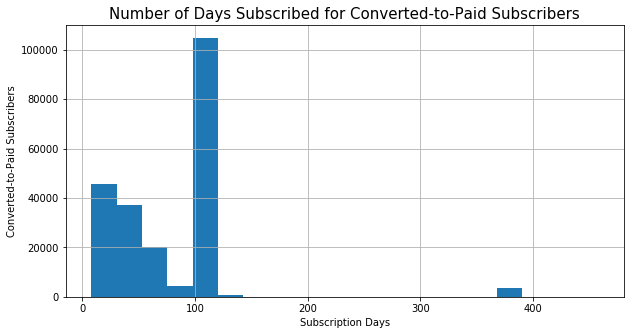

In [198]:
#Create a column in dfl that shows how long subscribers were/are subscribed for
dfl['expiration_date'] = pd.to_datetime(dfl['expiration_date'])
dfl['signup_date'] = pd.to_datetime(dfl['signup_date'])
dfl['subscribed_days'] = dfl['expiration_date']- dfl['signup_date']
dfl['subscribed_days'] = dfl['subscribed_days'].dt.days

subs = dfl[dfl.converted_to_paid==1]
subs.subscribed_days[dfl.subscribed_days > 7].hist(figsize=(10,5), bins = 20)
plt.title('Number of Days Subscribed for Converted-to-Paid Subscribers', fontsize=15)
plt.ylabel('Converted-to-Paid Subscribers', fontsize=10)
plt.xlabel('Subscription Days', fontsize=10)



# INSIGHT:
* Vast majority of subscribers who joined in October are churning within 100-120 days. Only a fraction of subscribers chose an annual plan. 

* Recommendation: Consider looking for ways entice users to choose a yearly plan over a monthly subscription. 

Breakdown of churned subscribers by platform
Number of churned subscribers:
65735
Number of churned subscribers as a percentage of entire customer base:
10.0
          subscription_source_ref  paid_churn_flag   Results
platform                                                    
AMAZON                      21812             3297  0.151155
APPLE                      128728            30651  0.238107
BAMTECH                    114060            21392  0.187550
GOOGLE                      31593             7959  0.251923
ROKU                        13811             2436  0.176381


Text(0.5,0,'Platform')

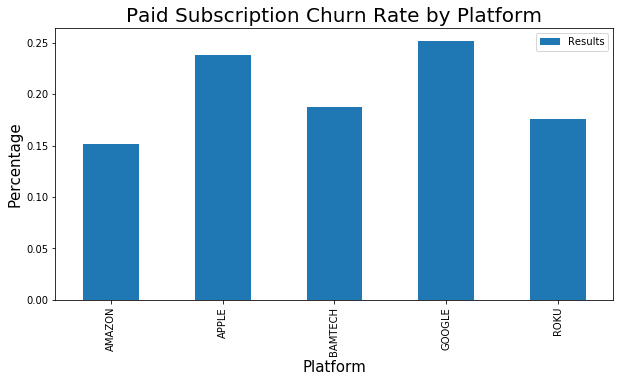

In [209]:
print('Breakdown of churned subscribers by platform')
print('Number of churned subscribers:')
print(dfl.paid_churn_flag.sum())
print('Number of churned subscribers as a percentage of entire customer base:')
print((dfl.paid_churn_flag.sum() / dfsl.paid_churn_flag.count()).round(1) * 100.)

churndf = pd.DataFrame(dfl.groupby('platform').agg({'subscription_source_ref':'count', 'paid_churn_flag': 'sum'}))
churndf['Results'] = churndf['paid_churn_flag']/churndf['subscription_source_ref']
print(churndf)
#print(round(churndf['Results']* 100, 2))

#Visualizing
test_df = pd.DataFrame(churndf['Results'])
test_df.plot.bar(figsize=(10,5))
plt.title('Paid Subscription Churn Rate by Platform', fontsize=20)
plt.ylabel('Percentage', fontsize=15)
plt.xlabel('Platform', fontsize=15)

# Insight
* APPLE leads in driving the most subscribers but it also has the second-highest churn rate out of the five platforms. which makes sense with its extensive platform reach. While its subscription base is small, AMAZON has the lowest churn rate among all. 
* Recommendation: Consider looking into previous marketing campaigns for each platform to ascertain what type of consumers are signing up on the different platforms.

Breakdown of total subscribers by platform
Free to paid conversion rate by platform:
platform
AMAZON     70.28
APPLE      54.14
BAMTECH    92.75
GOOGLE     54.55
ROKU       62.34
Name: Results, dtype: float64%


Text(0.5,0,'Platform')

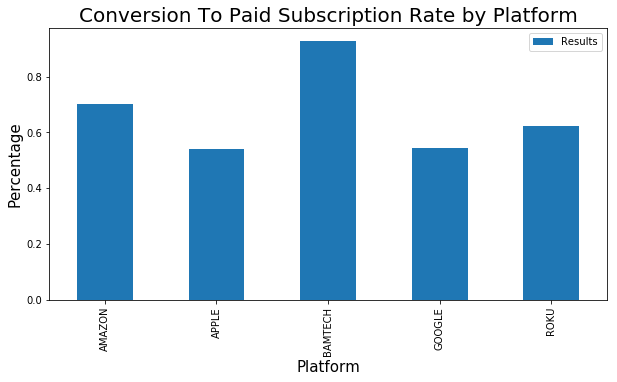

In [163]:
print('Breakdown of total subscribers by platform')
grouped = pd.DataFrame(dfl.groupby('platform').agg({'subscription_source_ref':'count', 'converted_to_paid': 'sum'}))
grouped['Results'] = grouped['converted_to_paid']/grouped['subscription_source_ref']

print('Free to paid conversion rate by platform:')
print((str(round(grouped['Results'] * 100, 2)) + '%'))

#Visualizing
test_df = pd.DataFrame(grouped['Results'])
test_df.plot.bar(figsize=(10,5))
plt.title('Conversion To Paid Subscription Rate by Platform', fontsize=20)
plt.ylabel('Percentage', fontsize=15)
plt.xlabel('Platform', fontsize=15)


Percentage of Daily, Weekly, Monthly Active Subscribers by Platform:
          daily  weekly  monthly
platform                        
AMAZON     2.65   11.31    23.68
APPLE      3.63   15.30    31.65
BAMTECH    4.54   18.53    37.47
GOOGLE     3.91   17.01    37.37
ROKU       3.51   17.60    37.09


Text(0.5,0,'Platform')

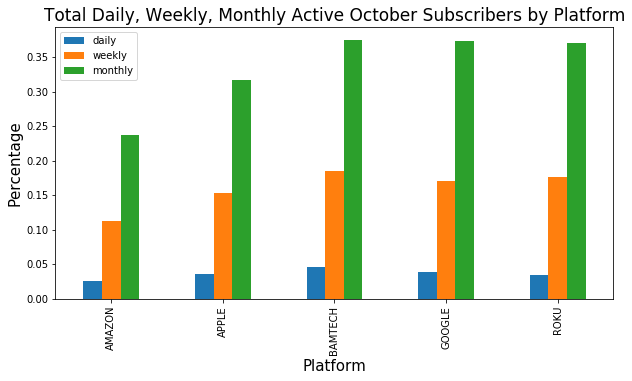

In [102]:
#Daily, Weekly, Monthly Dataframes
dactive = pd.DataFrame(dfl.groupby('platform').agg({'daily_active_user_flag': 'sum','is_active': 'sum'}))
dactive['daily'] = gactive['daily_active_user_flag']/dactive['is_active']

wactive = pd.DataFrame(dfl.groupby('platform').agg({'weekly_active_user_flag': 'sum','is_active': 'sum'}))
wactive['weekly'] = wactive['weekly_active_user_flag']/wactive['is_active']

mactive = pd.DataFrame(dfl.groupby('platform').agg({'monthy_active_user_flag': 'sum','is_active': 'sum'}))
mactive['monthly'] = mactive['monthy_active_user_flag']/mactive['is_active']

#Merge Dataframes
merged = dactive.merge(wactive, left_index=True, right_index=True, how='inner')
merged1 = merged.merge(mactive, left_index=True, right_index=True, how='inner')

print('Percentage of Daily, Weekly, Monthly Active Subscribers by Platform:')
print(round(merged1[['daily', 'weekly', 'monthly']] * 100, 2))

#Visualizing
#test_df = pd.DataFrame(dactive['daily'])
merged1[['daily', 'weekly', 'monthly']].plot.bar(figsize=(10,5))
plt.title('Total Daily, Weekly, Monthly Active October Subscribers by Platform', fontsize=17)
plt.ylabel('Percentage', fontsize=15)
plt.xlabel('Platform', fontsize=15)



# Insight: 
* Majority of subscribers are on the AMAZON and BAMTECH platforms, that combined, command over a quarter of total subscribers in October 2018. Subscribers from those platforms also have the highest conversion rates, with more than +70% of subscribers in October from each platform converting from free to paid subscriptions. 
* Subscribers on APPLE, GOOGLE, and ROKU have lower conversions rates, suggesting that subscribers on those platforms are not receiving the same user experience like the ones offered on AMAZON and BAMTECH.
* Looking at daily, weekly, and monthly active subscribers that were active by the date of the dataset, subscribers on BAMTECH have the highest rate of active subscribers from those three groups, closely followed by ROKU. 
* While AMAZON drive the most subscribers, the platform has the lowest percentage of active subscribers for those groups. 

* Recommendation 1: Consider looking into marketing spend for each platform to compare ROI and to ascertain if user experience, content distribution, etc. on the other three platforms are lacking to improve conversion rates as well as engagement rates.
* Recommendaton 2: Look into users that convert to paid accidentally. Theses are users that put in their payment info, subscribe to for the free trail, and forget to unsubscribe before the end of their free trial.
* Recommendation 3: Consider looking into the ease at which an user can sign-up and cancel his/her subscription by platform to see how much it can effect the churn rates.

Text(0.5,0,'Sport')

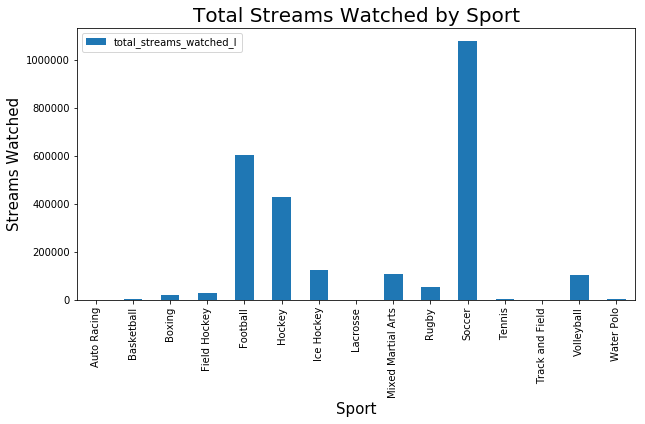

In [193]:
sportdf = pd.DataFrame(df.groupby('sport').agg({'total_streams_watched_l':'sum'}))

#Visualizing
sportdf.plot.bar(figsize=(10,5))
plt.title('Total Streams Watched by Sport', fontsize=20)
plt.ylabel('Streams Watched', fontsize=15)
plt.xlabel('Sport', fontsize=15)




# Insight
* Subscribers were overwhelming streaming SOCCER content, followed by FOOTBALL and HOCKEY. This is heavily influenced by seasonality; its also plausible that users are signing up to watch one or few high-profile games for these sports, that are skewing the numbers.

* Recommendation: look at sports streams during multiple times of the year to compare stream watches against historical watches. 